**This notebook explores the [NASA JPL Asteroid Dataset](https://www.kaggle.com/sakhawat18/asteroid-dataset) using machine learning techniques to create a model to predict whether asteroids are potentially hazardous or not.**

# Nasa JPL Asteroid Prediction



### Basic Column Definition from the [JPL website](https://ssd.jpl.nasa.gov/sbdb_query.cgi)
* SPK-ID: Object primary SPK-ID
* Object ID: Object internal database ID
* Object fullname: Object full name/designation
* pdes: Object primary designation
* name: Object IAU name
* NEO: Near-Earth Object (NEO) flag
* PHA: Potentially Hazardous Asteroid (PHA) flag
* H: Absolute magnitude parameter
* Diameter: object diameter (from equivalent sphere) km Unit
* Albedo: Geometric albedo
* Diameter_sigma: 1-sigma uncertainty in object diameter km Unit
* Orbit_id: Orbit solution ID
* Epoch: Epoch of osculation in modified Julian day form
* Equinox: Equinox of reference frame
* e: Eccentricity
* a: Semi-major axis au Unit
* q: perihelion distance au Unit
* i: inclination; angle with respect to x-y ecliptic plane
* tp: Time of perihelion passage TDB Unit
* moid_ld: Earth Minimum Orbit Intersection Distance au Unit

Use the "Run" button to execute the code.

In [ ]:
!pip install jovian --upgrade --quiet

In [ ]:
import jovian

In [ ]:
# Execute this to save new versions of the notebook
jovian.commit(project="course-project")

[jovian] Detected Colab notebook...
[jovian] Please enter your API key ( from https://jovian.ai/ ):
API KEY: ··········
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/shubhambalodi79/course-project


'https://jovian.ai/shubhambalodi79/course-project'

In [ ]:
!pip install opendatasets

In [ ]:
import pandas as pd
import opendatasets as od
import os
import numpy as np
import matplotlib.pyplot
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

## Downloading the Data

The dataset is available at https://www.kaggle.com/sakhawat18/asteroid-dataset .


We'll use the [`opendatasets` library](https://github.com/JovianML/opendatasets) to download the data from Kaggle directly within Jupyter. 

In [ ]:
od.download("https://www.kaggle.com/sakhawat18/asteroid-dataset")

  3%|▎         | 5.00M/182M [00:00<00:04, 40.1MB/s]

100%|██████████| 182M/182M [00:01<00:00, 110MB/s] 


In [ ]:

os.listdir('asteroid-dataset')

['dataset.csv']

### importing the dataset

In [ ]:
dataset = pd.read_csv('asteroid-dataset/dataset.csv',low_memory=False)
dataset

,id,spkid,full_name,pdes,name,prefix,neo,pha,H,diameter,albedo,diameter_sigma,orbit_id,epoch,epoch_mjd,epoch_cal,equinox,e,a,q,i,om,w,ma,ad,n,tp,tp_cal,per,per_y,moid,moid_ld,sigma_e,sigma_a,sigma_q,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms
0,a0000001,2000001,1 Ceres,1,Ceres,NaN,N,N,3.400,939.400,0.0900,0.200,JPL 47,2458600.5,58600,20190427.0,J2000,0.076009,2.769165,2.558684,10.594067,80.305531,73.597695,77.372098,2.979647,0.213885,2.458239e+06,2.018043e+07,1683.145703,4.608202,1.594780,620.640533,4.819000e-12,1.032800e-11,1.956900e-11,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,MBA,0.43301
1,a0000002,2000002,2 Pallas,2,Pallas,NaN,N,N,4.200,545.000,0.1010,18.000,JPL 37,2459000.5,59000,20200531.0,J2000,0.229972,2.773841,2.135935,34.832932,173.024741,310.202392,144.975675,3.411748,0.213345,2.458321e+06,2.018072e+07,1687.410992,4.619880,1.234290,480.348639,3.193400e-08,4.033700e-09,8.832200e-08,3.469400e-06,6.272400e-06,9.128200e-06,8.859100e-06,4.961300e-09,4.653600e-10,4.078700e-05,3.680700e-06,MBA,0.35936
2,a0000003,2000003,3 Juno,3,Juno,NaN,N,N,5.330,246.596,0.2140,10.594,JPL 112,2459000.5,59000,20200531.0,J2000,0.256936,2.668285,1.982706,12.991043,169.851482,248.066193,125.435355,3.353865,0.226129,2.458446e+06,2.018112e+07,1592.013769,4.358696,1.034290,402.514639,3.052000e-08,3.471800e-09,8.139200e-08,3.223100e-06,1.664600e-05,1.772100e-05,8.110400e-06,4.363900e-09,4.413400e-10,3.528800e-05,3.107200e-06,MBA,0.33848
3,a0000004,2000004,4 Vesta,4,Vesta,NaN,N,N,3.000,525.400,0.4228,0.200,JPL 35,2458600.5,58600,20190427.0,J2000,0.088721,2.361418,2.151909,7.141771,103.810804,150.728541,95.861938,2.570926,0.271609,2.458248e+06,2.018051e+07,1325.432763,3.628837,1.139480,443.451432,2.332100e-10,1.514300e-09,1.928600e-09,2.170600e-07,3.880800e-07,1.789300e-07,1.206800e-06,1.648600e-09,2.612500e-10,4.103700e-06,1.274900e-06,MBA,0.39980
4,a0000005,2000005,5 Astraea,5,Astraea,NaN,N,N,6.900,106.699,0.2740,3.140,JPL 114,2459000.5,59000,20200531.0,J2000,0.190913,2.574037,2.082619,5.367427,141.571026,358.648418,17.846343,3.065455,0.238661,2.458926e+06,2.020032e+07,1508.414421,4.129814,1.095750,426.433028,2.373700e-08,3.970900e-09,6.092400e-08,2.740800e-06,2.894900e-05,2.984200e-05,8.303800e-06,4.729000e-09,5.522700e-10,3.474300e-05,3.490500e-06,MBA,0.52191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
958519,bPLS6013,3246801,(6013 P-L),6013 P-L,NaN,NaN,N,N,17.135,NaN,NaN,NaN,JPL 5,2437203.5,37203,19600926.0,J2000,0.185919,2.280861,1.856807,5.984416,194.229902,195.442802,342.057565,2.704916,0.286125,2.437266e+06,1.960113e+07,1258.191614,3.444741,0.861979,335.456367,2.142200e-02,8.779900e-01,7.299800e-01,6.969000e+00,7.433000e+00,4.631100e+01,2.738300e+01,1.041200e+00,1.652100e-01,1.309700e+02,7.264900e+02,MBA,0.23839
958520,bPLS6331,3246834,(6331 P-L),6331 P-L,NaN,NaN,N,N,18.500,NaN,NaN,NaN,8,2459000.5,59000,20200531.0,J2000,0.282920,2.334910,1.674319,8.082280,355.248239,5.216223,260.113042,2.995502,0.276248,2.459362e+06,2.021053e+07,1303.177916,3.567907,0.671242,261.227249,2.642000e-07,1.885500e-08,6.256300e-07,1.563500e-05,5.598600e-05,2.380400e-04,1.298200e-04,2.418900e-08,3.346100e-09,4.690200e-04,1.578500e-05,MBA,0.53633
958521,bPLS6344,3013075,(6344 P-L),6344 P-L,NaN,NaN,Y,Y,20.400,NaN,NaN,NaN,17,2459000.5,59000,20200531.0,J2000,0.662446,2.817152,0.950941,4.679278,182.982832,234.894852,240.473601,4.683363,0.208444,2.459574e+06,2.021123e+07,1727.085364,4.728502,0.035589,13.850093,6.636800e-08,9.925600e-08,1.687100e-07,1.853300e-05,5.691700e-05,8.969200e-05,5.272600e-05,1.650100e-07,1.101600e-08,2.830600e-04,9.127500e-05,APO,0.51556
958522,bT2S2060,3246457,(2060 T-2),2060 T-2,NaN,NaN,N,N,18.071,NaN,NaN,NaN,JPL 3,2441956.5,41956,19731001.0,J2000,0.202053,2.373137,1.893638,0.732484,176.499082,198.026527,355.3

In [ ]:
jovian.commit(project="course-projec")

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/shubhambalodi79/course-project


'https://jovian.ai/shubhambalodi79/course-project'

In [ ]:
pd.options.display.max_columns = 200
pd.options.display.max_rows = 200
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958524 entries, 0 to 958523
Data columns (total 45 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              958524 non-null  object 
 1   spkid           958524 non-null  int64  
 2   full_name       958524 non-null  object 
 3   pdes            958524 non-null  object 
 4   name            22064 non-null   object 
 5   prefix          18 non-null      object 
 6   neo             958520 non-null  object 
 7   pha             938603 non-null  object 
 8   H               952261 non-null  float64
 9   diameter        136209 non-null  float64
 10  albedo          135103 non-null  float64
 11  diameter_sigma  136081 non-null  float64
 12  orbit_id        958524 non-null  object 
 13  epoch           958524 non-null  float64
 14  epoch_mjd       958524 non-null  int64  
 15  epoch_cal       958524 non-null  float64
 16  equinox         958524 non-null  object 
 17  e         

In [ ]:
dataset.describe()

,spkid,H,diameter,albedo,diameter_sigma,epoch,epoch_mjd,epoch_cal,e,a,q,i,om,w,ma,ad,n,tp,tp_cal,per,per_y,moid,moid_ld,sigma_e,sigma_a,sigma_q,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,rms
count,9.585240e+05,952261.000000,136209.000000,135103.000000,136081.000000,9.585240e+05,958524.000000,9.585240e+05,958524.000000,958524.000000,958524.000000,958524.000000,958524.000000,958524.000000,958523.000000,958520.000000,9.585240e+05,9.585240e+05,9.585240e+05,9.585200e+05,9.585230e+05,9.386030e+05,958397.000000,9.386020e+05,9.386020e+05,9.386020e+05,9.386020e+05,9.386020e+05,9.386020e+05,9.386020e+05,9.385980e+05,9.386020e+05,9.386020e+05,9.385980e+05,958522.000000
mean,3.810114e+06,16.906411,5.506429,0.130627,0.479184,2.458869e+06,58868.781950,2.019693e+07,0.156116,2.902143,2.394887,9.054901,168.456416,181.369457,177.352582,3.455820,2.366846e-01,2.458856e+06,2.019581e+07,5.085344e+03,1.392287e+01,1.415162e+00,539.364207,7.262721e-01,1.541424e+01,1.982929e+01,1.168449e+00,5.310234e+00,1.370062e+06,1.369977e+06,2.131453e+01,5.060221e-02,4.312780e+08,8.525815e+04,0.561153
std,6.831541e+06,1.790405,9.425164,0.110323,0.782895,7.016716e+02,701.671573,1.930354e+04,0.092643,39.719503,2.139246,6.637656,102.881707,103.887995,105.816844,71.769401,7.941705e-02,1.580506e+03,4.337669e+04,2.308961e+06,6.321581e+03,2.156731e+00,834.306975,9.336391e+01,4.392381e+03,2.903785e+03,1.282231e+02,1.333381e+03,9.158996e+08,9.158991e+08,7.197034e+03,9.814953e+00,2.953046e+11,2.767681e+07,2.745700
min,2.000001e+06,-1.100000,0.002500,0.001000,0.000500,2.425052e+06,25051.000000,1.927062e+07,0.000000,-14702.447872,0.070511,0.007744,0.000025,0.000130,-70.703676,0.653773,1.608247e-07,2.283183e+06,1.539011e+07,1.511918e+02,0.000000e+00,4.544120e-07,0.000000,4.819000e-12,1.032800e-11,1.956900e-11,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,0.000000
25%,2.239632e+06,16.100000,2.780000,0.053000,0.180000,2.459000e+06,59000.000000,2.020053e+07,0.092193,2.387835,1.971401,4.165419,80.604399,91.482063,83.785012,2.781603,1.894969e-01,2.458560e+06,2.019032e+07,1.347738e+03,3.689903e+00,9.797020e-01,375.394939,5.474900e-08,2.046500e-08,1.462000e-07,6.095900e-06,3.619400e-05,5.755000e-05,2.573700e-05,2.340900e-08,2.768800e-09,1.110900e-04,1.794500e-05,0.518040
50%,2.479262e+06,16.900000,3.972000,0.079000,0.332000,2.459000e+06,59000.000000,2.020053e+07,0.145002,2.646969,2.225816,7.415665,159.826919,182.358081,175.641078,3.046995,2.288655e-01,2.458945e+06,2.020041e+07,1.572976e+03,4.306571e+00,1.240850e+00,477.706175,8.171600e-08,3.849150e-08,2.271900e-07,8.688800e-06,6.642550e-05,1.047100e-04,4.900100e-05,4.359000e-08,4.638000e-09,2.230800e-04,3.501700e-05,0.566280
75%,3.752518e+06,17.714000,5.765000,0.190000,0.620000,2.459000e+06,59000.000000,2.020053e+07,0.200650,3.001932,2.578315,12.407550,252.247751,271.521589,269.865749,3.364793,2.671142e-01,2.459361e+06,2.021053e+07,1.899765e+03,5.201272e+00,1.593370e+00,617.324804,2.336475e-07,1.044675e-07,6.583200e-07,1.591500e-05,1.609775e-04,3.114400e-04,1.718900e-04,1.196600e-07,1.124000e-08,8.139600e-04,9.775475e-05,0.613927
max,5.401723e+07,33.200000,939.400000,1.000000,140.000000,2.459000e+06,59000.000000,2.020053e+07,1.855356,33488.895955,80.398819,175.082901,359.999793,359.999646,491.618014,66972.796064,2.381082e+00,2.546362e+06,2.259081e+07,2.238462e+09,6.128574e+06,7.947660e+01,30929.908422,3.942500e+04,3.241200e+06,1.015000e+06,5.533000e+04,1.199100e+06,8.845100e+11,8.845100e+11,5.509700e+06,7.698800e+03,2.853100e+14,1.910700e+10,2686.600000


In [ ]:
dataset.isna().sum()

id                     0
spkid                  0
full_name              0
pdes                   0
name              936460
prefix            958506
neo                    4
pha                19921
H                   6263
diameter          822315
albedo            823421
diameter_sigma    822443
orbit_id               0
epoch                  0
epoch_mjd              0
epoch_cal              0
equinox                0
e                      0
a                      0
q                      0
i                      0
om                     0
w                      0
ma                     1
ad                     4
n                      0
tp                     0
tp_cal                 0
per                    4
per_y                  1
moid               19921
moid_ld              127
sigma_e            19922
sigma_a            19922
sigma_q            19922
sigma_i            19922
sigma_om           19922
sigma_w            19922
sigma_ma           19922
sigma_ad           19926


In [ ]:
dataset.shape

(958524, 45)

In [ ]:
dataset.columns

Index(['id', 'spkid', 'full_name', 'pdes', 'name', 'prefix', 'neo', 'pha', 'H',
       'diameter', 'albedo', 'diameter_sigma', 'orbit_id', 'epoch',
       'epoch_mjd', 'epoch_cal', 'equinox', 'e', 'a', 'q', 'i', 'om', 'w',
       'ma', 'ad', 'n', 'tp', 'tp_cal', 'per', 'per_y', 'moid', 'moid_ld',
       'sigma_e', 'sigma_a', 'sigma_q', 'sigma_i', 'sigma_om', 'sigma_w',
       'sigma_ma', 'sigma_ad', 'sigma_n', 'sigma_tp', 'sigma_per', 'class',
       'rms'],
      dtype='object')

In [ ]:
dataset.dropna(subset=['neo', 'pha'], inplace=True)

###**Data Exploration**

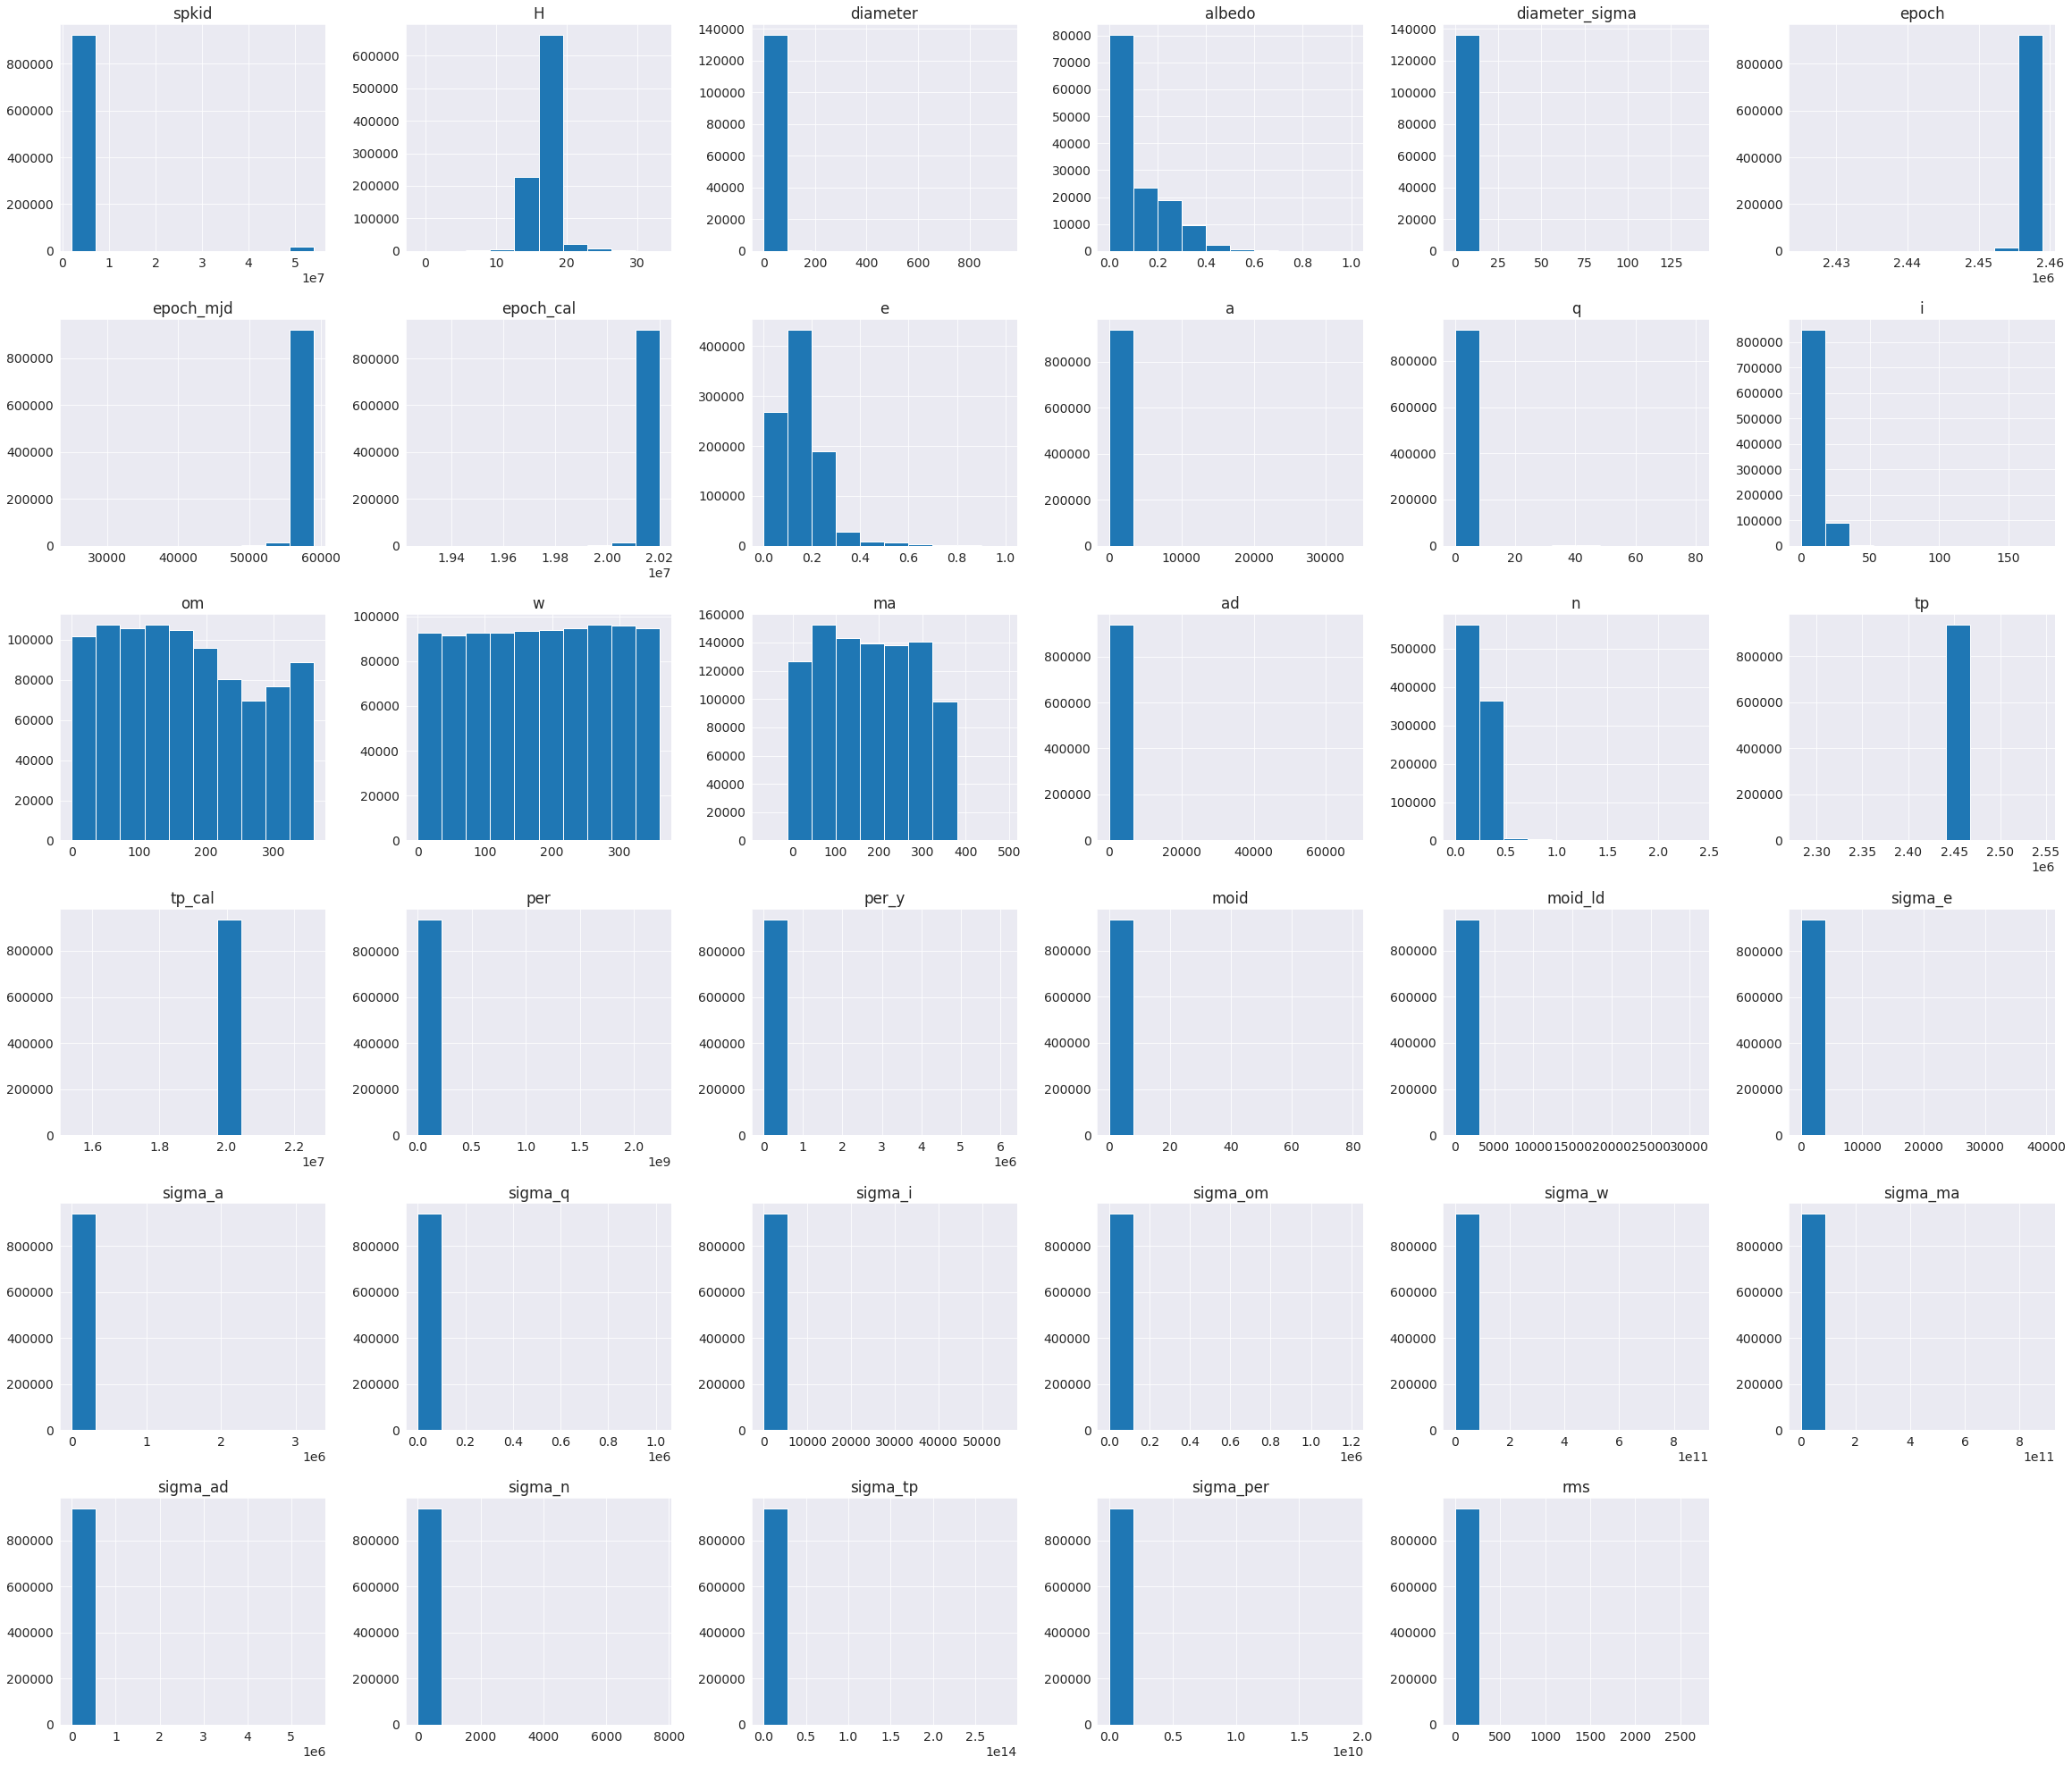

In [ ]:
dataset.hist(figsize=(40,35))
plt.show()

In [ ]:
jovian.commit(project="course-projec")

In [ ]:
dataset["neo"].value_counts()

N    935625
Y     22895
Name: neo, dtype: int64

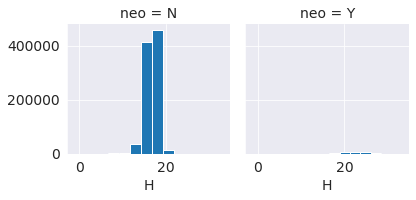

In [ ]:
g = sns.FacetGrid(data=dataset,col='neo')
g.map(plt.hist,'H')

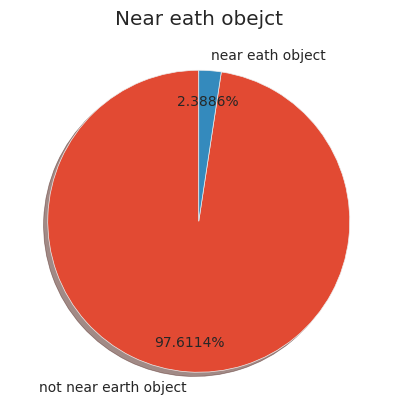

In [ ]:
plt.figure(figsize=(8,5), dpi=100)

plt.style.use('ggplot')
explode = (0,.1)

label = ['not near earth object', 'near eath object']
plt.title("Near eath obejct")
plt.pie(dataset['neo'].value_counts(), labels=label,pctdistance=0.8, autopct='%0.4f%%', shadow=True, startangle=90)
plt.show()

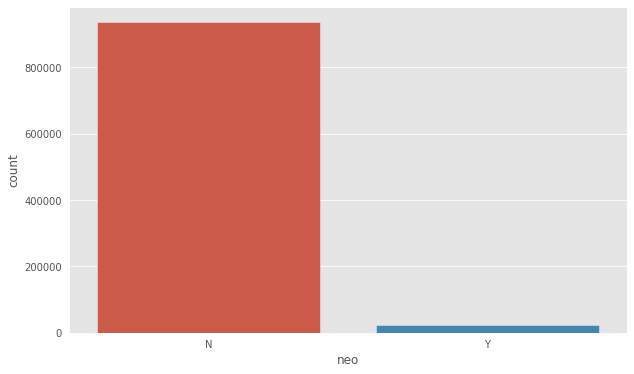

In [ ]:
sns.countplot(x='neo',data=dataset)

In [ ]:
dataset["pha"].value_counts()

N    936537
Y      2066
Name: pha, dtype: int64

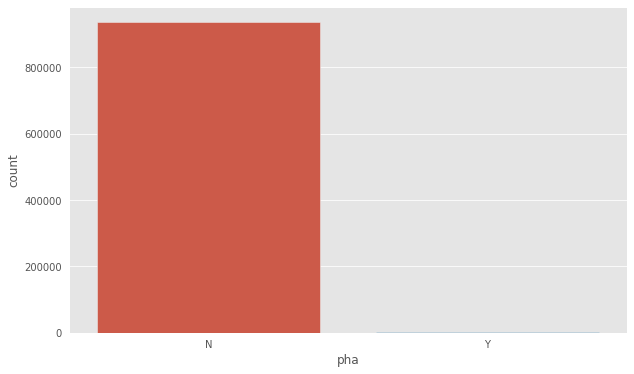

In [ ]:
sns.countplot(x='pha',data=dataset)

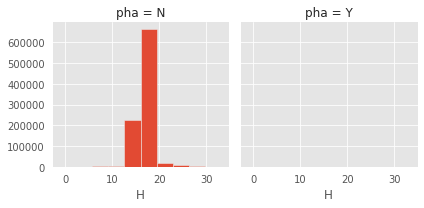

In [ ]:
g = sns.FacetGrid(data=dataset,col='pha')
g.map(plt.hist,'H')

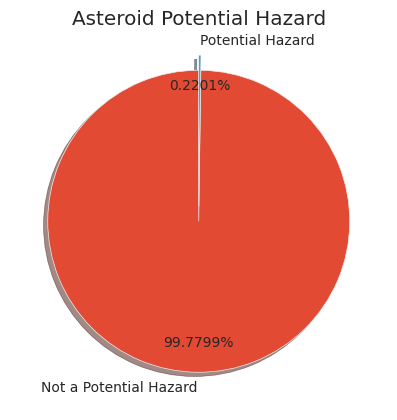

In [ ]:
plt.figure(figsize=(8,5), dpi=100)

plt.style.use('ggplot')
explode = (0,.1)

label = ['Not a Potential Hazard', 'Potential Hazard']
plt.title("Asteroid Potential Hazard")
plt.pie(dataset['pha'].value_counts(), labels=label,pctdistance=0.8,explode = explode ,  autopct='%0.4f%%', shadow=True, startangle=90)
plt.show()

In [ ]:
jovian.commit(project="course-project")

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/shubhambalodi79/course-project


'https://jovian.ai/shubhambalodi79/course-project'

In [ ]:
dataset['class'].value_counts()

MBA    855954
OMB     28355
IMB     20360
MCA     18685
APO     12687
AMO      8457
TJN      8221
TNO      3468
ATE      1729
CEN       506
AST        76
IEO        22
HYA         4
Name: class, dtype: int64

In [ ]:
px.histogram(dataset, x='class', title='neo vs class', color='neo')

Output hidden; open in https://colab.research.google.com to view.

In [130]:
dataset.diameter.describe()

count    136209.000000
mean          5.506429
std           9.425164
min           0.002500
25%           2.780000
50%           3.972000
75%           5.765000
max         939.400000
Name: diameter, dtype: float64

In [131]:
px.histogram(dataset, 
             x='diameter', 
             title='diameter near eath objects', 
             color='neo')

Output hidden; open in https://colab.research.google.com to view.

In [132]:
jovian.commit(project="course-project")

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/shubhambalodi79/course-project


'https://jovian.ai/shubhambalodi79/course-project'

In [133]:
dataset.H.describe()

count    932337.000000
mean         16.889982
std           1.801350
min          -1.100000
25%          16.000000
50%          16.900000
75%          17.700000
max          33.200000
Name: H, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



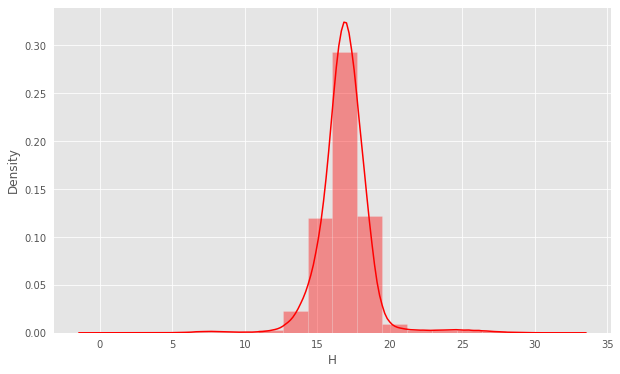

In [134]:
sns.distplot(dataset['H'],color = "red", bins = 20)


In [135]:
dataset.rms.describe()

count    9.385980e+05
mean     5.672902e-01
std      2.774329e+00
min      3.292200e-11
25%      5.218000e-01
50%      5.680100e-01
75%      6.151800e-01
max      2.686600e+03
Name: rms, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



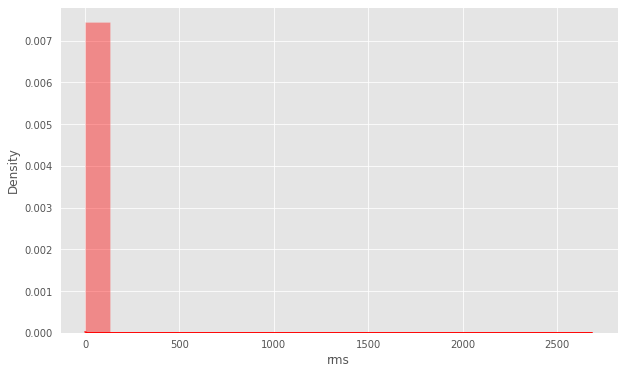

In [136]:
sns.distplot(dataset['rms'],color = "red", bins = 20)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



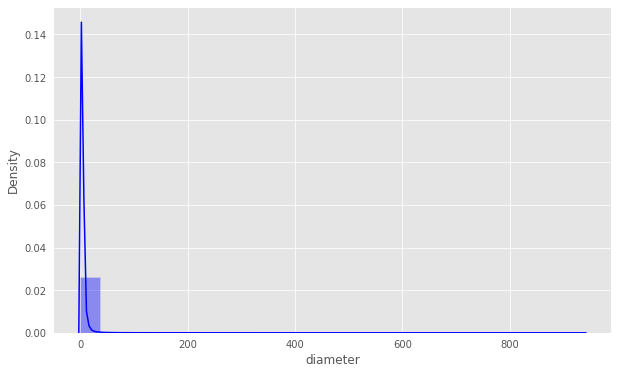

In [137]:
sns.distplot(dataset['diameter'],color = "blue", bins = 25)

In [138]:
fig = px.histogram(dataset, 
                   x='H', 
                   marginal='box', 
                   nbins=47, 
                   title='Distribution of H (Absolute magnitude parameter)')
fig.update_layout(bargap=0.1)
fig.show()

Output hidden; open in https://colab.research.google.com to view.

Text(0, 0.5, 'values')

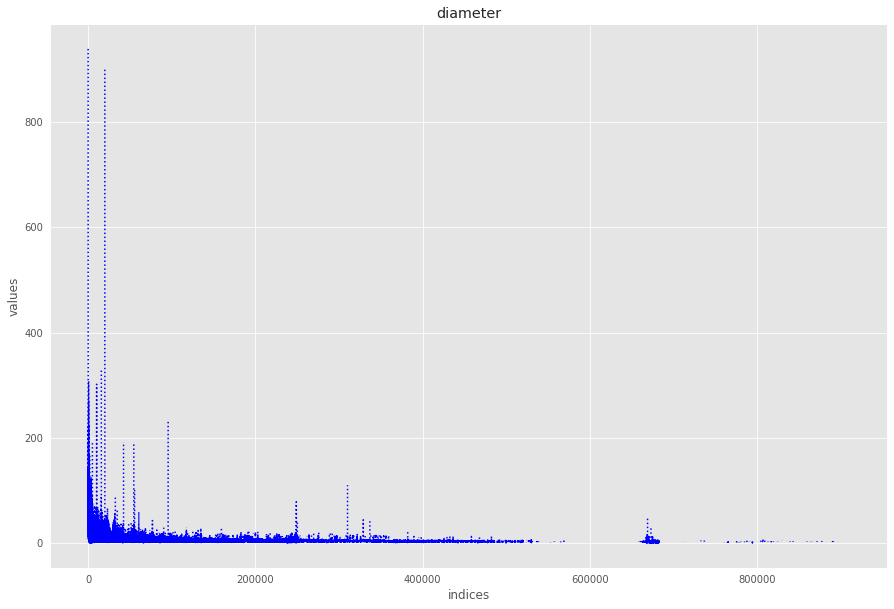

In [139]:

plt.figure(figsize=(15,10))
dataset["diameter"].plot(kind= "line" , grid = True , color = "blue" , alpha = 1 , linestyle = "dotted")
plt.title("diameter")
plt.xlabel("indices")
plt.ylabel("values")

In [ ]:
jovian.commit(project="course-project")

In [ ]:
dataset

In [140]:
fig = px.histogram(dataset, 
                   x='albedo', 
                   marginal='box', 
                   nbins=40, 
                   title='Distribution of albedo')
fig.update_layout(bargap=0.1)
fig.show()

Output hidden; open in https://colab.research.google.com to view.

In [144]:
fig = px.histogram(dataset, 
                   x='ma', 
                   marginal='box', 
                   nbins=40, 
                   title='Distribution of albedo')
fig.update_layout(bargap=0.1)
fig.show()

In [ ]:
jovian.commit(project="course-project")

###Data cleaning

**dropping the redundent columns**

In [ ]:
asteroid_df = dataset.drop(['id', 'pdes', 'name', 'prefix', 'equinox','spkid','diameter_sigma', 'full_name','epoch_mjd', 'epoch_cal','sigma_w','sigma_a','a'], axis='columns', inplace=False)

In [ ]:
asteroid_df

,neo,pha,H,diameter,albedo,orbit_id,epoch,e,q,i,om,w,ma,ad,n,tp,tp_cal,per,per_y,moid,moid_ld,sigma_e,sigma_q,sigma_i,sigma_om,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms
0,N,N,3.400,939.400,0.0900,JPL 47,2458600.5,0.076009,2.558684,10.594067,80.305531,73.597695,77.372098,2.979647,0.213885,2.458239e+06,2.018043e+07,1683.145703,4.608202,1.594780,620.640533,4.819000e-12,1.956900e-11,4.608900e-09,6.168800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,MBA,0.43301
1,N,N,4.200,545.000,0.1010,JPL 37,2459000.5,0.229972,2.135935,34.832932,173.024741,310.202392,144.975675,3.411748,0.213345,2.458321e+06,2.018072e+07,1687.410992,4.619880,1.234290,480.348639,3.193400e-08,8.832200e-08,3.469400e-06,6.272400e-06,8.859100e-06,4.961300e-09,4.653600e-10,4.078700e-05,3.680700e-06,MBA,0.35936
2,N,N,5.330,246.596,0.2140,JPL 112,2459000.5,0.256936,1.982706,12.991043,169.851482,248.066193,125.435355,3.353865,0.226129,2.458446e+06,2.018112e+07,1592.013769,4.358696,1.034290,402.514639,3.052000e-08,8.139200e-08,3.223100e-06,1.664600e-05,8.110400e-06,4.363900e-09,4.413400e-10,3.528800e-05,3.107200e-06,MBA,0.33848
3,N,N,3.000,525.400,0.4228,JPL 35,2458600.5,0.088721,2.151909,7.141771,103.810804,150.728541,95.861938,2.570926,0.271609,2.458248e+06,2.018051e+07,1325.432763,3.628837,1.139480,443.451432,2.332100e-10,1.928600e-09,2.170600e-07,3.880800e-07,1.206800e-06,1.648600e-09,2.612500e-10,4.103700e-06,1.274900e-06,MBA,0.39980
4,N,N,6.900,106.699,0.2740,JPL 114,2459000.5,0.190913,2.082619,5.367427,141.571026,358.648418,17.846343,3.065455,0.238661,2.458926e+06,2.020032e+07,1508.414421,4.129814,1.095750,426.433028,2.373700e-08,6.092400e-08,2.740800e-06,2.894900e-05,8.303800e-06,4.729000e-09,5.522700e-10,3.474300e-05,3.490500e-06,MBA,0.52191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
958519,N,N,17.135,NaN,NaN,JPL 5,2437203.5,0.185919,1.856807,5.984416,194.229902,195.442802,342.057565,2.704916,0.286125,2.437266e+06,1.960113e+07,1258.191614,3.444741,0.861979,335.456367,2.142200e-02,7.299800e-01,6.969000e+00,7.433000e+00,2.738300e+01,1.041200e+00,1.652100e-01,1.309700e+02,7.264900e+02,MBA,0.23839
958520,N,N,18.500,NaN,NaN,8,2459000.5,0.282920,1.674319,8.082280,355.248239,5.216223,260.113042,2.995502,0.276248,2.459362e+06,2.021053e+07,1303.177916,3.567907,0.671242,261.227249,2.642000e-07,6.256300e-07,1.563500e-05,5.598600e-05,1.298200e-04,2.418900e-08,3.346100e-09,4.690200e-04,1.578500e-05,MBA,0.53633
958521,Y,Y,20.400,NaN,NaN,17,2459000.5,0.662446,0.950941,4.679278,182.982832,234.894852,240.473601,4.683363,0.208444,2.459574e+06,2.021123e+07,1727.085364,4.728502,0.035589,13.850093,6.636800e-08,1.687100e-07,1.853300e-05,5.691700e-05,5.272600e-05,1.650100e-07,1.101600e-08,2.830600e-04,9.127500e-05,APO,0.51556
958522,N,N,18.071,NaN,NaN,JPL 3,2441956.5,0.202053,1.893638,0.732484,176.499082,198.026527,355.351127,2.852636,0.269600,2.441974e+06,1.973102e+07,1335.311579,3.655884,0.893896,347.877506,3.169800e-02,5.478400e-01,5.448800e-01,4.391600e+00,1.083800e+01,7.171600e-01,1.016700e-01,3.898400e+01,5.035500e+02,MBA,0.25641


In [ ]:
asteroid_df["diameter"] = asteroid_df["diameter"].replace(np.NaN, asteroid_df["diameter"].mean())
asteroid_df["albedo"] = asteroid_df["albedo"].replace(np.NaN, asteroid_df["albedo"].mean())

In [ ]:
jovian.commit(project="course-project")

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/shubhambalodi79/course-project


'https://jovian.ai/shubhambalodi79/course-project'

In [ ]:
asteroid_df.isna().sum()

neo              4
pha          19921
H             6263
diameter         0
albedo           0
orbit_id         0
epoch            0
e                0
q                0
i                0
om               0
w                0
ma               1
ad               4
n                0
tp               0
tp_cal           0
per              4
per_y            1
moid         19921
moid_ld        127
sigma_e      19922
sigma_q      19922
sigma_i      19922
sigma_om     19922
sigma_ma     19922
sigma_ad     19926
sigma_n      19922
sigma_tp     19922
sigma_per    19926
class            0
rms              2
dtype: int64

columns with null values

In [ ]:
col_with_na = ["H" , "ma" , "sigma_e" , "sigma_q" , "sigma_i" , "sigma_om", "sigma_ma" , "sigma_ad","sigma_n","sigma_tp" , "sigma_per" , "rms"]

dropping all the null values

In [ ]:
asteroid_df.dropna(subset = col_with_na , how = "any" , inplace = True)

In [ ]:
asteroid_df

,neo,pha,H,diameter,albedo,orbit_id,epoch,e,q,i,om,w,ma,ad,n,tp,tp_cal,per,per_y,moid,moid_ld,sigma_e,sigma_q,sigma_i,sigma_om,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms
0,N,N,3.400,939.400000,0.090000,JPL 47,2458600.5,0.076009,2.558684,10.594067,80.305531,73.597695,77.372098,2.979647,0.213885,2.458239e+06,2.018043e+07,1683.145703,4.608202,1.594780,620.640533,4.819000e-12,1.956900e-11,4.608900e-09,6.168800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,MBA,0.43301
1,N,N,4.200,545.000000,0.101000,JPL 37,2459000.5,0.229972,2.135935,34.832932,173.024741,310.202392,144.975675,3.411748,0.213345,2.458321e+06,2.018072e+07,1687.410992,4.619880,1.234290,480.348639,3.193400e-08,8.832200e-08,3.469400e-06,6.272400e-06,8.859100e-06,4.961300e-09,4.653600e-10,4.078700e-05,3.680700e-06,MBA,0.35936
2,N,N,5.330,246.596000,0.214000,JPL 112,2459000.5,0.256936,1.982706,12.991043,169.851482,248.066193,125.435355,3.353865,0.226129,2.458446e+06,2.018112e+07,1592.013769,4.358696,1.034290,402.514639,3.052000e-08,8.139200e-08,3.223100e-06,1.664600e-05,8.110400e-06,4.363900e-09,4.413400e-10,3.528800e-05,3.107200e-06,MBA,0.33848
3,N,N,3.000,525.400000,0.422800,JPL 35,2458600.5,0.088721,2.151909,7.141771,103.810804,150.728541,95.861938,2.570926,0.271609,2.458248e+06,2.018051e+07,1325.432763,3.628837,1.139480,443.451432,2.332100e-10,1.928600e-09,2.170600e-07,3.880800e-07,1.206800e-06,1.648600e-09,2.612500e-10,4.103700e-06,1.274900e-06,MBA,0.39980
4,N,N,6.900,106.699000,0.274000,JPL 114,2459000.5,0.190913,2.082619,5.367427,141.571026,358.648418,17.846343,3.065455,0.238661,2.458926e+06,2.020032e+07,1508.414421,4.129814,1.095750,426.433028,2.373700e-08,6.092400e-08,2.740800e-06,2.894900e-05,8.303800e-06,4.729000e-09,5.522700e-10,3.474300e-05,3.490500e-06,MBA,0.52191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
958519,N,N,17.135,5.506429,0.130627,JPL 5,2437203.5,0.185919,1.856807,5.984416,194.229902,195.442802,342.057565,2.704916,0.286125,2.437266e+06,1.960113e+07,1258.191614,3.444741,0.861979,335.456367,2.142200e-02,7.299800e-01,6.969000e+00,7.433000e+00,2.738300e+01,1.041200e+00,1.652100e-01,1.309700e+02,7.264900e+02,MBA,0.23839
958520,N,N,18.500,5.506429,0.130627,8,2459000.5,0.282920,1.674319,8.082280,355.248239,5.216223,260.113042,2.995502,0.276248,2.459362e+06,2.021053e+07,1303.177916,3.567907,0.671242,261.227249,2.642000e-07,6.256300e-07,1.563500e-05,5.598600e-05,1.298200e-04,2.418900e-08,3.346100e-09,4.690200e-04,1.578500e-05,MBA,0.53633
958521,Y,Y,20.400,5.506429,0.130627,17,2459000.5,0.662446,0.950941,4.679278,182.982832,234.894852,240.473601,4.683363,0.208444,2.459574e+06,2.021123e+07,1727.085364,4.728502,0.035589,13.850093,6.636800e-08,1.687100e-07,1.853300e-05,5.691700e-05,5.272600e-05,1.650100e-07,1.101600e-08,2.830600e-04,9.127500e-05,APO,0.51556
958522,N,N,18.071,5.506429,0.130627,JPL 3,2441956.5,0.202053,1.893638,0.732484,176.499082,198.026527,355.351127,2.852636,0.269600,2.441974e+06,1.973102e+07,1335.311579,3.655884,0.893896,347.877506,3.169800e-02,5.478400e-01,5.448800e-01,4.391600e+00,1.083800e+01,7.171600e-01,1.016700e-01,3.898400e+01,5.035500e+02,MBA,0.25641


In [ ]:
asteroid_df.columns

Index(['neo', 'pha', 'H', 'diameter', 'albedo', 'orbit_id', 'epoch', 'e', 'q',
       'i', 'om', 'w', 'ma', 'ad', 'n', 'tp', 'tp_cal', 'per', 'per_y', 'moid',
       'moid_ld', 'sigma_e', 'sigma_q', 'sigma_i', 'sigma_om', 'sigma_ma',
       'sigma_ad', 'sigma_n', 'sigma_tp', 'sigma_per', 'class', 'rms'],
      dtype='object')

In [ ]:
use_sample = True
sample_fraction = 0.60
if use_sample:
    asteroid_df = asteroid_df.sample(frac=sample_fraction).copy()

## Preparing the Data for Training

We'll perform the following steps to prepare the dataset for training:

1. Create a train/test/validation split
2. Identify input and target columns
3. Identify numeric and categorical columns
4. Scale numeric values to the $(0, 1)$ range
5. Encode categorical columns to one-hot vectors

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_val_df, test_df = train_test_split(asteroid_df, test_size=0.2, random_state=42)
train_df, val_df = train_test_split(train_val_df, test_size=0.2, random_state=42)

In [ ]:
print('train_df.shape :', train_df.shape)
print('val_df.shape :', val_df.shape)
print('test_df.shape :', test_df.shape)

train_df.shape : (358016, 32)
val_df.shape : (89504, 32)
test_df.shape : (111881, 32)


In [ ]:
train_df

,neo,pha,H,diameter,albedo,orbit_id,epoch,e,q,i,om,w,ma,ad,n,tp,tp_cal,per,per_y,moid,moid_ld,sigma_e,sigma_q,sigma_i,sigma_om,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms
852696,N,N,20.406,5.506429,0.130627,4,2459000.5,0.317312,1.483219,6.927654,166.151497,161.005156,174.499839,2.862014,0.307772,2.458434e+06,2.018111e+07,1169.696054,3.202453,0.474365,184.608627,5.954600e-05,4.697900e-05,0.000605,0.000775,0.097352,3.390500e-04,5.469000e-05,0.215600,0.207850,MCA,0.61873
498408,N,N,16.200,5.506429,0.130627,10,2459000.5,0.204852,2.483838,9.089615,304.225702,136.685357,108.017644,3.763645,0.178522,2.458395e+06,2.018100e+07,2016.559302,5.521038,1.509040,587.273097,1.424000e-07,4.303900e-07,0.000009,0.000050,0.000059,5.170800e-08,3.679000e-09,0.000323,0.000042,MBA,0.53717
895136,N,N,18.900,5.506429,0.130627,1,2459000.5,0.106841,1.702465,19.317109,312.339017,217.736142,292.276620,2.109769,0.374524,2.459181e+06,2.020113e+07,961.219771,2.631676,0.735742,286.328714,1.226000e-06,4.406700e-06,0.000093,0.000029,0.000498,3.470300e-06,9.240600e-07,0.001141,0.002372,IMB,0.47873
315932,N,N,13.700,5.506429,0.130627,JPL 13,2459000.5,0.048487,4.885955,7.685454,241.389388,175.039494,327.335466,5.383913,0.084704,2.459386e+06,2.021062e+07,4250.114881,11.636180,3.897930,1516.957418,8.372600e-08,5.376000e-07,0.000007,0.000069,0.000102,1.710900e-07,4.037500e-09,0.001215,0.000203,TJN,0.49667
280375,N,N,16.200,5.506429,0.130627,JPL 13,2459000.5,0.164829,2.338345,13.511152,201.979912,215.369900,172.985290,3.261336,0.210380,2.458178e+06,2.018023e+07,1711.190327,4.684984,1.361840,529.987273,6.897900e-08,1.940200e-07,0.000009,0.000022,0.000023,2.400500e-08,2.322700e-09,0.000104,0.000019,MBA,0.70371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103289,N,N,15.400,5.506429,0.130627,JPL 17,2459000.5,0.180660,2.228432,3.101444,356.138409,55.647632,239.738409,3.211144,0.219736,2.459548e+06,2.021113e+07,1638.328472,4.485499,1.240980,482.952187,4.333900e-08,1.191000e-07,0.000005,0.000081,0.000017,1.940000e-08,1.991300e-09,0.000083,0.000015,MBA,0.54934
40087,N,N,14.100,4.433000,0.298000,JPL 21,2459000.5,0.219811,2.131445,15.644876,111.762020,228.096904,273.551038,3.332474,0.218269,2.459397e+06,2.021070e+07,1649.338834,4.515644,1.152570,448.545667,5.005000e-08,1.411000e-07,0.000005,0.000023,0.000022,2.303200e-08,2.262800e-09,0.000102,0.000017,MBA,0.55770
835933,N,N,18.700,5.506429,0.130627,1,2459000.5,0.177987,1.851366,0.822589,119.501963,70.379205,208.740018,2.653103,0.291597,2.459519e+06,2.021103e+07,1234.578899,3.380093,0.851953,331.554549,7.026500e-06,2.030600e-05,0.000011,0.000839,0.002890,6.422400e-06,1.058800e-06,0.011732,0.004483,MBA,0.68092
770160,N,N,17.341,5.506429,0.130627,JPL 2,2456720.5,0.148830,2.649592,10.785086,326.279399,113.637589,74.227216,3.576170,0.179457,2.456307e+06,2.013011e+07,2006.051997,5.492271,1.686920,656.498656,4.898200e-02,8.824300e-02,0.715450,1.508200,19.689000,8.755900e-02,6.590700e-03,95.744000,73.674000,MBA,0.55403


In [ ]:
val_df

,neo,pha,H,diameter,albedo,orbit_id,epoch,e,q,i,om,w,ma,ad,n,tp,tp_cal,per,per_y,moid,moid_ld,sigma_e,sigma_q,sigma_i,sigma_om,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms
737623,N,N,16.400,5.506429,0.130627,JPL 2,2459000.5,0.093464,2.868455,21.091052,310.204955,67.215506,187.351131,3.459931,0.175109,2.459986e+06,2.023021e+07,2055.856675,5.628629,1.931020,751.495053,4.495800e-07,1.337500e-06,0.000016,0.000029,0.000139,1.402500e-07,1.064800e-08,0.000784,0.000125,MBA,0.77938
655710,N,N,17.011,5.506429,0.130627,JPL 1,2459000.5,0.078160,2.642233,2.423179,160.044584,220.368295,304.156296,3.090285,0.203110,2.459275e+06,2.021030e+07,1772.440080,4.852676,1.644980,640.176867,8.988000e-08,2.605000e-07,0.000006,0.000265,0.000073,4.689100e-08,4.622900e-09,0.000361,0.000040,MBA,0.55940
767627,N,N,18.000,5.506429,0.130627,JPL 3,2459000.5,0.044439,2.169331,6.962100,93.237870,95.426000,283.877776,2.371104,0.288140,2.459265e+06,2.021022e+07,1249.394659,3.420656,1.181300,459.726521,1.375500e-07,3.473700e-07,0.000009,0.000087,0.000175,5.234100e-08,9.540800e-09,0.000612,0.000041,MBA,0.59741
358592,N,N,17.000,5.506429,0.130627,12,2459000.5,0.141892,2.090707,4.938795,20.153027,218.053559,273.640220,2.782121,0.259166,2.459334e+06,2.021043e+07,1389.072965,3.803075,1.081610,420.930164,6.060000e-08,1.449900e-07,0.000009,0.000064,0.000028,3.568700e-08,4.986600e-09,0.000109,0.000027,MBA,0.58626
580720,N,N,18.200,5.506429,0.130627,JPL 14,2459000.5,0.036146,1.774734,22.052209,20.018252,139.610533,67.094624,1.907844,0.394477,2.458830e+06,2.019121e+07,912.601612,2.498567,0.786677,306.151088,8.843500e-08,1.642100e-07,0.000014,0.000014,0.000538,1.333700e-08,4.136500e-09,0.001363,0.000010,IMB,0.51925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51321,N,N,14.100,6.341000,0.121000,JPL 24,2459000.5,0.119531,2.782229,5.836521,46.804771,163.812654,235.410783,3.537651,0.175463,2.459711e+06,2.022051e+07,2051.713236,5.617285,1.777100,691.594007,6.856100e-08,2.232600e-07,0.000006,0.000052,0.000022,2.989700e-08,2.224300e-09,0.000132,0.000026,MBA,0.55989
523858,N,N,16.300,5.506429,0.130627,7,2459000.5,0.073992,2.830243,10.129986,182.956069,262.342754,158.123862,3.282542,0.184455,2.458143e+06,2.018012e+07,1951.695562,5.343451,1.868990,727.354838,1.192400e-07,3.409300e-07,0.000010,0.000055,0.000110,6.205500e-08,5.230500e-09,0.000606,0.000055,MBA,0.65085
412140,N,N,17.800,5.506429,0.130627,11,2459000.5,0.141689,2.223595,4.132842,23.475595,237.300626,201.352290,2.957735,0.236367,2.459672e+06,2.022040e+07,1523.054143,4.169895,1.211670,471.545614,5.931200e-08,1.447000e-07,0.000012,0.000136,0.000063,5.031500e-08,6.031400e-09,0.000269,0.000039,MBA,0.59487
173340,N,N,16.400,5.506429,0.130627,JPL 20,2459000.5,0.184528,1.987781,1.460135,151.367410,255.585300,149.612290,2.887388,0.258979,2.458423e+06,2.018103e+07,1390.073980,3.805815,0.998099,388.430188,4.670900e-08,1.132700e-07,0.000005,0.000167,0.000012,1.162400e-08,1.564000e-09,0.000046,0.000008,MBA,0.54121


In [ ]:
test_df

,neo,pha,H,diameter,albedo,orbit_id,epoch,e,q,i,om,w,ma,ad,n,tp,tp_cal,per,per_y,moid,moid_ld,sigma_e,sigma_q,sigma_i,sigma_om,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms
712832,N,N,17.800,5.506429,0.130627,4,2459000.5,0.203419,2.181228,4.330391,69.316415,279.639725,14.807859,3.295248,0.217519,2.458932e+06,2.020032e+07,1655.027446,4.531218,1.180150,459.278976,6.352900e-05,2.018800e-04,0.000317,0.000855,0.017308,7.466900e-05,7.393300e-06,0.080348,0.056253,MBA,0.69229
219317,N,N,17.500,5.506429,0.130627,9,2459000.5,0.129743,2.094968,0.594846,261.896486,250.255584,181.412968,2.719626,0.263882,2.459677e+06,2.022041e+07,1364.246875,3.735104,1.105600,430.266352,6.786200e-08,1.543700e-07,0.000006,0.000708,0.000035,2.195400e-08,3.195200e-09,0.000139,0.000017,MBA,0.65288
256131,N,N,17.200,5.506429,0.130627,11,2459000.5,0.083429,2.463092,3.153730,228.746648,264.045315,321.491262,2.911487,0.223734,2.459173e+06,2.020112e+07,1609.052000,4.405344,1.479870,575.921008,5.554100e-08,1.506200e-07,0.000007,0.000114,0.000045,2.480500e-08,2.859200e-09,0.000200,0.000021,MBA,0.61378
330040,N,N,17.500,5.506429,0.130627,JPL 7,2459000.5,0.043269,2.521617,4.595663,60.009356,229.274500,263.927090,2.749704,0.230340,2.459418e+06,2.021072e+07,1562.904786,4.279000,1.508200,586.946194,5.527200e-08,1.447900e-07,0.000007,0.000084,0.000082,3.128900e-08,3.931600e-09,0.000355,0.000027,MBA,0.63548
452325,N,N,16.100,5.506429,0.130627,JPL 12,2459000.5,0.257396,1.996751,12.595505,288.135077,29.101690,189.327996,3.380951,0.223539,2.459764e+06,2.022070e+07,1610.455052,4.409186,0.992222,386.143036,1.039300e-07,2.788000e-07,0.000010,0.000031,0.000023,3.175500e-08,3.149300e-09,0.000113,0.000023,MBA,0.58374
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
602598,N,N,18.146,5.506429,0.130627,JPL 1,2459000.5,0.172729,2.191956,4.688580,332.954737,16.112557,63.763904,3.107291,0.228522,2.458721e+06,2.019083e+07,1575.341577,4.313050,1.185930,461.528378,4.810900e-07,1.264100e-06,0.000027,0.000223,0.000179,6.164100e-08,6.799900e-09,0.000786,0.000047,MBA,0.47605
284133,N,N,17.900,5.506429,0.130627,JPL 9,2459000.5,0.170292,1.829673,4.157876,178.706410,124.592654,254.668805,2.580727,0.300976,2.459350e+06,2.021052e+07,1196.107911,3.274765,0.818489,318.531364,4.431800e-08,1.009800e-07,0.000005,0.000075,0.000023,1.741600e-08,3.046700e-09,0.000080,0.000012,MBA,0.54889
227097,N,N,17.400,5.506429,0.130627,11,2459000.5,0.189230,1.883898,1.424903,261.196735,20.975067,87.899659,2.763286,0.278269,2.458685e+06,2.019072e+07,1293.714024,3.541996,0.867514,337.610423,7.123900e-08,1.698300e-07,0.000006,0.000375,0.000031,2.273900e-08,3.434800e-09,0.000111,0.000016,MBA,0.57743
665256,N,N,14.600,9.784000,0.027000,5,2459000.5,0.087103,4.734711,6.911950,358.205199,94.795957,284.006382,5.638221,0.083444,2.459911e+06,2.022113e+07,4314.254520,11.811785,3.760370,1463.423193,9.241200e-03,3.274500e-02,0.007486,0.069173,4.659600,1.813200e-02,4.025300e-04,60.229000,20.812000,TJN,0.66595


### Input and Target Columns

 identify the input and target columns.

In [ ]:
input_cols = list(train_df.columns)[2:]

target_col = 'pha'

In [ ]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()

test_inputs = test_df[input_cols].copy()
test_targets = test_df[target_col].copy()

val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()

identify the numeric and categorical columns.

In [ ]:
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()

In [ ]:
train_inputs[numeric_cols].describe()

,H,diameter,albedo,epoch,e,q,i,om,w,ma,ad,n,tp,tp_cal,per,per_y,moid,moid_ld,sigma_e,sigma_q,sigma_i,sigma_om,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,rms
count,358016.000000,358016.000000,358016.000000,3.580160e+05,358016.000000,358016.000000,358016.000000,358016.000000,358016.000000,358016.000000,358016.000000,358016.000000,3.580160e+05,3.580160e+05,3.580160e+05,358016.000000,3.580160e+05,358016.000000,3.580160e+05,3.580160e+05,3.580160e+05,3.580160e+05,3.580160e+05,3.580160e+05,3.580160e+05,3.580160e+05,3.580160e+05,358016.000000
mean,16.893313,5.511998,0.130854,2.458896e+06,0.156108,2.393818,8.992214,168.511004,181.255776,177.087173,3.362229,0.236714,2.458886e+06,2.019662e+07,2.453354e+03,6.716917,1.411185e+00,549.190876,6.806230e-01,1.587176e+01,1.043016e+00,2.706323e+00,2.779472e+05,2.577618e+01,4.537368e-02,8.320445e+07,1.095393e+05,0.564265
std,1.792422,3.646039,0.041471,6.418453e+02,0.093015,2.128832,6.576547,102.876275,103.859403,105.779509,13.262393,0.080245,1.562245e+03,4.287586e+04,1.082766e+05,296.445152,2.126157e+00,827.436526,9.933645e+01,2.281583e+03,1.440508e+02,4.764669e+02,4.233669e+07,9.344211e+03,1.531166e+01,1.284353e+10,3.692869e+07,0.095945
min,-0.100000,0.019000,0.001000,2.430612e+06,0.000003,0.070511,0.007744,0.000025,0.000130,-67.136826,0.773666,0.000006,2.334330e+06,1.679013e+07,1.649623e+02,0.451642,4.544120e-07,0.000177,4.819000e-12,1.956900e-11,4.608900e-09,6.168800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,0.011602
25%,16.000000,5.506429,0.130627,2.459000e+06,0.092086,1.972069,4.139372,80.591923,91.447775,83.495236,2.782797,0.189443,2.458573e+06,2.019033e+07,1.348378e+03,3.691657,9.802137e-01,381.469785,5.468100e-08,1.458800e-07,6.084100e-06,3.605300e-05,2.566800e-05,2.331500e-08,2.764200e-09,1.107500e-04,1.787200e-05,0.522270
50%,16.900000,5.506429,0.130627,2.459000e+06,0.144793,2.227293,7.356721,160.119166,182.210286,174.927764,3.048182,0.228759,2.458951e+06,2.020041e+07,1.573711e+03,4.308587,1.241255e+00,483.059208,8.124600e-08,2.257600e-07,8.653700e-06,6.584900e-05,4.863000e-05,4.323300e-08,4.607300e-09,2.211700e-04,3.470300e-05,0.568090
75%,17.700000,5.506429,0.130627,2.459000e+06,0.200600,2.579750,12.337607,252.086132,271.262372,269.829807,3.365260,0.266987,2.459364e+06,2.021053e+07,1.900305e+03,5.202750,1.593192e+00,620.022725,2.186300e-07,6.177400e-07,1.555200e-05,1.565600e-04,1.623300e-04,1.139825e-07,1.074000e-08,7.698900e-04,9.350900e-05,0.615180
max,32.516000,939.400000,1.000000,2.459000e+06,0.998362,80.398819,175.082901,359.998332,359.998075,412.187451,5995.089384,2.182317,2.536620e+06,2.232121e+07,6.001790e+07,164320.043452,7.947660e+01,30929.908422,3.942500e+04,7.010900e+05,5.533000e+04,1.978800e+05,1.465700e+10,5.509700e+06,7.698800e+03,4.580000e+12,1.910700e+10,12.217000


In [ ]:
train_inputs[categorical_cols].nunique()

orbit_id    392
class        12
dtype: int64

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/shubhambalodi79/course-project


'https://jovian.ai/shubhambalodi79/course-project'

### Scaling Numeric Features

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(asteroid_df[numeric_cols])

MinMaxScaler(copy=True, feature_range=(0, 1))

In [ ]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [ ]:
train_inputs[numeric_cols].describe()

,H,diameter,albedo,epoch,e,q,i,om,w,ma,ad,n,tp,tp_cal,per,per_y,moid,moid_ld,sigma_e,sigma_q,sigma_i,sigma_om,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,rms
count,358016.000000,358016.000000,358016.000000,358016.000000,358016.000000,358016.000000,358016.000000,358016.000000,358016.000000,358016.000000,358016.000000,358016.000000,358016.000000,358016.000000,3.580160e+05,3.580160e+05,358016.000000,358016.000000,3.580160e+05,3.580160e+05,3.580160e+05,3.580160e+05,3.580160e+05,3.580160e+05,3.580160e+05,3.580160e+05,3.580160e+05,358016.000000
mean,0.521012,0.005847,0.129984,0.996305,0.156362,0.028923,0.051318,0.468088,0.503491,0.509517,0.000432,0.105966,0.615728,0.615882,3.819195e-05,3.819195e-05,0.017756,0.017756,1.726374e-05,1.563720e-05,1.885082e-05,1.367658e-05,8.323518e-06,4.678327e-06,5.893604e-06,7.988905e-06,5.732941e-06,0.030517
std,0.054955,0.003881,0.041513,0.022610,0.093168,0.026502,0.037564,0.285769,0.288500,0.220685,0.002212,0.035923,0.007723,0.007752,1.804077e-03,1.804077e-03,0.026752,0.026752,2.519631e-03,2.247865e-03,2.603485e-03,2.407858e-03,1.267831e-03,1.695956e-03,1.988837e-03,1.233176e-03,1.932731e-03,0.005189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.335504e-08,6.335504e-08,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000627
25%,0.493623,0.005842,0.129757,1.000000,0.092234,0.023672,0.023599,0.223867,0.254023,0.314259,0.000335,0.084805,0.614184,0.614745,1.978112e-05,1.978112e-05,0.012333,0.012333,1.386840e-12,1.437049e-13,1.098769e-10,1.818845e-10,7.684299e-16,4.229611e-15,3.588876e-13,1.063007e-17,9.348712e-16,0.028246
50%,0.521217,0.005842,0.129757,1.000000,0.145028,0.026850,0.041976,0.444777,0.506142,0.505012,0.000379,0.102405,0.616050,0.616568,2.353557e-05,2.353557e-05,0.015618,0.015618,2.060651e-12,2.224044e-13,1.563183e-10,3.324606e-10,1.456059e-15,7.844690e-15,5.982885e-13,2.123209e-17,1.815753e-15,0.030724
75%,0.545744,0.005842,0.129757,1.000000,0.200926,0.031237,0.070426,0.700242,0.753510,0.703003,0.000432,0.119519,0.618094,0.618397,2.897718e-05,2.897718e-05,0.020046,0.020046,5.545344e-12,6.085916e-13,2.809939e-10,7.908748e-10,4.860964e-15,2.068559e-14,1.394867e-12,7.391764e-17,4.893473e-15,0.033271
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.999999,1.000000,1.000000,1.000000,0.976950,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000,1.000000,1.000000e+00,6.907291e-01,1.000000e+00,1.000000e+00,4.389243e-01,1.000000e+00,1.000000e+00,4.397504e-01,1.000000e+00,0.660736


### Encoding Categorical Data

In [ ]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
encoder.fit(asteroid_df[categorical_cols])

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='ignore', sparse=False)

In [ ]:
encoder.categories_

[array(['1', '10', '100', '101', '102', '103', '104', '105', '106', '107',
        '108', '109', '11', '110', '111', '112', '113', '114', '115',
        '116', '117', '118', '119', '12', '120', '121', '122', '123',
        '124', '125', '127', '128', '129', '13', '131', '132', '133',
        '134', '135', '136', '137', '138', '139', '14', '142', '144',
        '145', '146', '147', '149', '15', '150', '151', '152', '153',
        '155', '157', '158', '16', '161', '164', '165', '166', '167', '17',
        '170', '173', '176', '177', '178', '179', '18', '180', '184',
        '185', '187', '188', '19', '190', '191', '192', '197', '199', '2',
        '20', '200', '205', '206', '207', '209', '21', '210', '211', '214',
        '215', '216', '22', '220', '221', '222', '229', '23', '230', '231',
        '233', '235', '237', '238', '24', '240', '241', '247', '25', '253',
        '256', '26', '260', '27', '28', '280', '29', '294', '3', '30',
        '303', '31', '311', '313', '32', '324', '33', '

In [ ]:
encoded_cols = list(encoder.get_feature_names(categorical_cols))


In [ ]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])

In [ ]:
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])

In [ ]:
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

### Training

We can use `LogisticRegression` from `sklearn.linear_model` to train a decision tree.

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
?LogisticRegression

In [ ]:
model = LogisticRegression(solver='newton-cg')

In [ ]:
model.fit(train_inputs[numeric_cols + encoded_cols], train_targets)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
print(model.intercept_)

[-2.0556191]


In [ ]:
X_train = train_inputs[numeric_cols + encoded_cols]
X_val = val_inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols]

In [ ]:
train_preds = model.predict(X_train)

In [ ]:
train_preds

array(['N', 'N', 'N', ..., 'N', 'N', 'N'], dtype=object)

In [ ]:
train_targets

852696    N
498408    N
895136    N
315932    N
280375    N
         ..
103289    N
40087     N
835933    N
770160    N
845106    N
Name: pha, Length: 358016, dtype: object

In [ ]:
train_probs = model.predict_proba(X_train)
train_probs

array([[9.99925862e-01, 7.41381953e-05],
       [9.99987973e-01, 1.20271802e-05],
       [9.99915156e-01, 8.48435196e-05],
       ...,
       [9.99995500e-01, 4.50006491e-06],
       [9.99997940e-01, 2.05969181e-06],
       [9.99995722e-01, 4.27825816e-06]])

**Accuracy of model**

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(train_targets, train_preds)

0.9979442259563819

In [ ]:
val_preds = model.predict(X_val)
val_preds

array(['N', 'N', 'N', ..., 'N', 'N', 'N'], dtype=object)

In [ ]:
accuracy_score(val_targets, val_preds)

0.9976872542009295

In [ ]:
test_preds = model.predict(X_test)
test_preds

array(['N', 'N', 'N', ..., 'N', 'N', 'N'], dtype=object)

In [ ]:
accuracy_score(test_targets, test_preds)

0.9977922971728891

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/shubhambalodi79/course-project


'https://jovian.ai/shubhambalodi79/course-project'

In [ ]:
print(len(train_targets))
print(len(train_preds))

358016
358016


### Evaluation

Let's evaluate the logistic regression using the accuracy score.

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(train_targets, train_preds, normalize='true')

array([[9.99790062e-01, 2.09937607e-04],
       [8.61799218e-01, 1.38200782e-01]])

In [ ]:
def predict_and_plot(inputs, targets, name=''):
    preds = model.predict(inputs)
    
    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))
    
    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));
    
    return preds

Accuracy: 99.79%


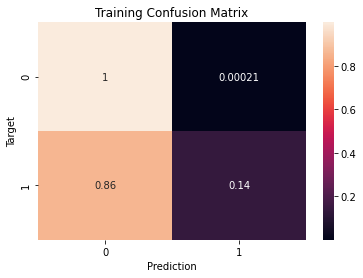

In [ ]:
train_preds = predict_and_plot(X_train, train_targets, 'Training')

Accuracy: 99.77%


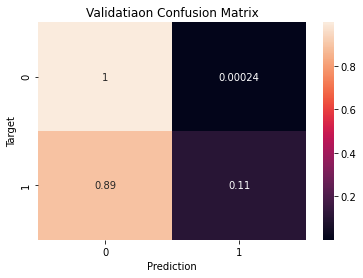

In [ ]:
val_preds = predict_and_plot(X_val, val_targets, 'Validatiaon')

Accuracy: 99.78%


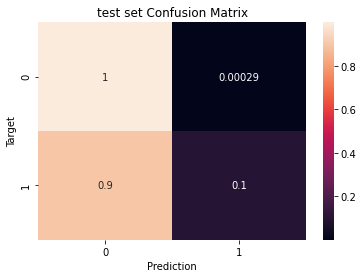

In [ ]:
test_preds = predict_and_plot(X_test, test_targets, 'test set')

**hyperparameter tuning**

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear')
model.fit(train_inputs[numeric_cols + encoded_cols], train_targets)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
print(model.intercept_)


[-0.79580712]


In [ ]:
train_preds = model.predict(X_train)
train_preds

array(['N', 'N', 'N', ..., 'N', 'N', 'N'], dtype=object)

In [ ]:
train_probs = model.predict_proba(X_train)
train_probs

array([[9.99922344e-01, 7.76556480e-05],
       [9.99987482e-01, 1.25183741e-05],
       [9.99911884e-01, 8.81160558e-05],
       ...,
       [9.99995409e-01, 4.59104444e-06],
       [9.99997774e-01, 2.22579276e-06],
       [9.99995616e-01, 4.38434946e-06]])

In [ ]:
accuracy_score(train_targets, train_preds)

0.9979470191276367

In [ ]:
print(accuracy_score(val_targets, val_preds))
print(accuracy_score(test_targets, test_preds))

0.9976872542009295
0.9977922971728891


In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/shubhambalodi79/course-project


'https://jovian.ai/shubhambalodi79/course-project'

### Training

Let's train the model using decisiontreeclassifier.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42)


In [ ]:
%%time
model.fit(X_train, train_targets)

CPU times: user 3.72 s, sys: 11.5 ms, total: 3.73 s
Wall time: 3.73 s


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

###Evalution

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
train_preds = model.predict(X_train)

In [ ]:
train_preds

array(['N', 'N', 'N', ..., 'N', 'N', 'N'], dtype=object)

In [ ]:
train_probs = model.predict_proba(X_train)
train_probs

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [ ]:
accuracy_score(train_targets, train_preds)

1.0

In [ ]:
model.score(X_val, val_targets)

0.9998771004647837

In [ ]:
model.score(X_test , test_targets)

0.9999463715912442

### Visualization

We can visualize the decision tree _learned_ from the training data.

In [ ]:
from sklearn.tree import plot_tree, export_text

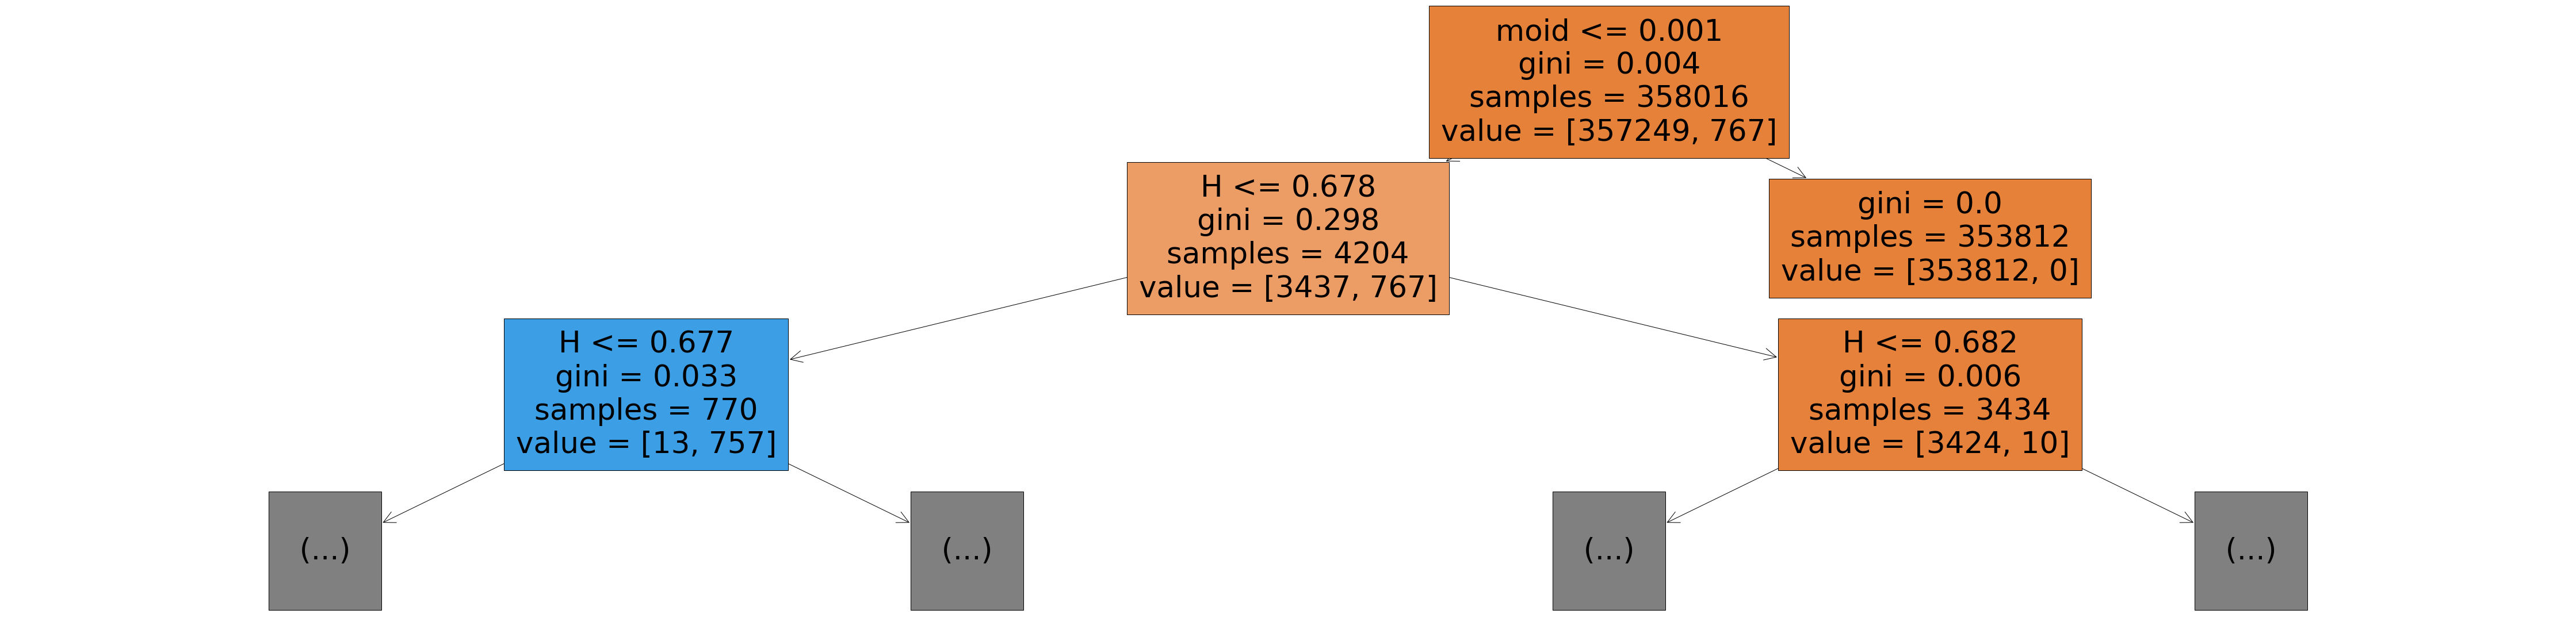

In [ ]:
plt.figure(figsize=(80,20))
plot_tree(model, feature_names=X_train.columns, max_depth=2, filled=True);

In [ ]:
model.tree_.max_depth

8

### Feature Importance

Based on the gini index computations, a decision tree assigns an "importance" value to each feature. These values can be used to interpret the results given by a decision tree.

In [ ]:
model.feature_importances_

array([0.79941776, 0.        , 0.        , 0.00083994, 0.00234514,
       0.00244347, 0.00130482, 0.00160353, 0.        , 0.00262834,
       0.        , 0.        , 0.00111993, 0.00109309, 0.        ,
       0.00117592, 0.18069003, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.00168294, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [ ]:
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

In [ ]:
importance_df.head(10)

,feature,importance
0,H,0.799418
16,moid,0.180690
9,ma,0.002628
5,q,0.002443
4,e,0.002345
27,rms,0.001683
7,om,0.001604
175,orbit_id_44,0.001305
6,i,0.001305
160,orbit_id_34,0.001230


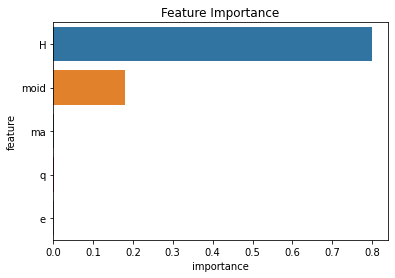

In [ ]:
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(5), x='importance', y='feature');

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/shubhambalodi79/course-project


'https://jovian.ai/shubhambalodi79/course-project'

**Hyperparameters Tuning**

max_depth

In [ ]:
model = DecisionTreeClassifier(max_depth=3, random_state=42)

In [ ]:
model.fit(X_train, train_targets)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [ ]:
model.score(X_train, train_targets)

0.9999357570611369

In [ ]:
model.score(X_val, val_targets)

0.9999106185198426

In [ ]:
model.score(X_test, test_targets)

0.9999821238637481

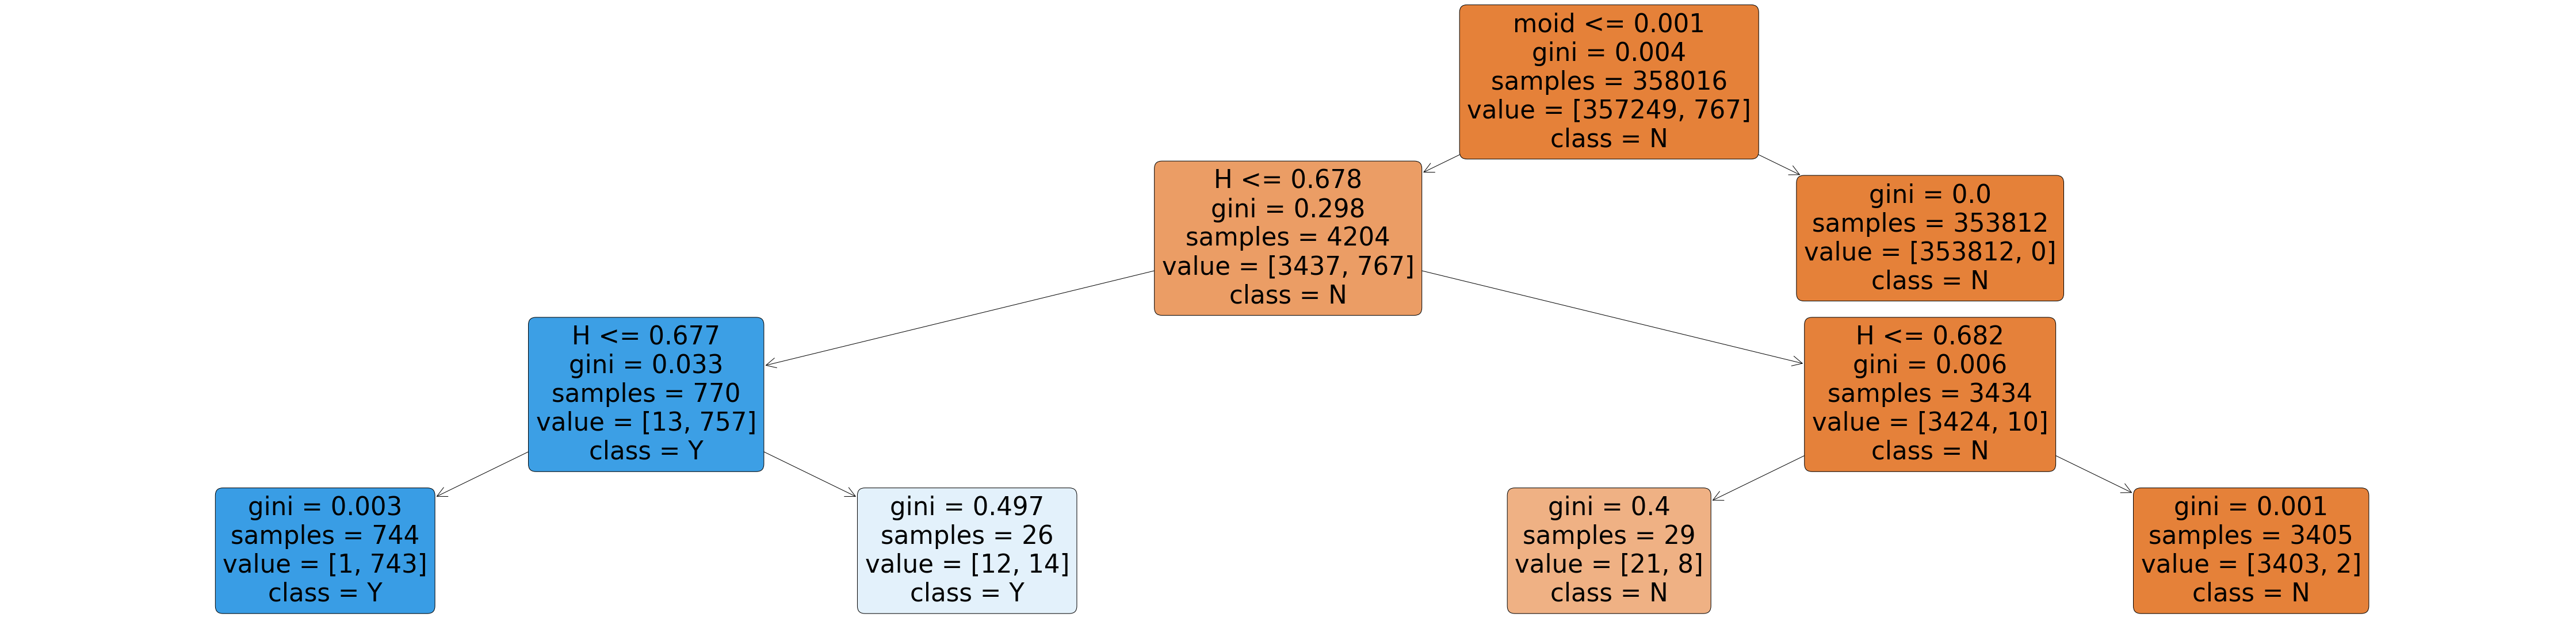

In [ ]:
plt.figure(figsize=(80,20))
plot_tree(model, feature_names=X_train.columns, filled=True, rounded=True, class_names=model.classes_);

In [ ]:
confusion_matrix(train_targets, train_preds, normalize='true')

array([[1., 0.],
       [0., 1.]])

In [ ]:
print(export_text(model, feature_names=list(X_train.columns)))

|--- moid <= 0.00
|   |--- H <= 0.68
|   |   |--- H <= 0.68
|   |   |   |--- class: Y
|   |   |--- H >  0.68
|   |   |   |--- class: Y
|   |--- H >  0.68
|   |   |--- H <= 0.68
|   |   |   |--- class: N
|   |   |--- H >  0.68
|   |   |   |--- class: N
|--- moid >  0.00
|   |--- class: N



In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/shubhambalodi79/course-project


'https://jovian.ai/shubhambalodi79/course-project'

In [145]:
jovian.submit(assignment="zerotogbms-project")

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/shubhambalodi79/course-project
[jovian] Submitting assignment..
[jovian] Verify your submission at https://jovian.ai/learn/machine-learning-with-python-zero-to-gbms/assignment/course-project-real-world-machine-learning-model
